In [2]:
'''
Population data from FRED API

'''

import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
import numpy as np
import os
from dateutil import parser
from collections import defaultdict

In [3]:

def do_series_search(search_data):
    '''
    Does a search of FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_search_url = 'https://api.stlouisfed.org/fred/series/search?api_key=4a35874b8a4526dd50b390e46f396651&search_text={0}&file_type=json'  
    if type(search_data) != type(list):
        search_data = [search_data]
    search_string = '+'.join([x.lower() for x in search_data])
    print(search_string)
    fred_response = requests.get(fred_search_url.format(search_string))
    result = fred_response.json()
    return result
    
def get_series(series_id):
    '''
    Fetches FRED data series
    INPUT: data to seach (list of strings)
    OUTPUT: json results from FRED
    '''
    fred_series_fetch_url = 'https://api.stlouisfed.org/fred/series/observations?series_id={0}' + \
'&api_key=4a35874b8a4526dd50b390e46f396651&file_type=json'
    fred_response = requests.get(fred_series_fetch_url.format(series_id))
    result = fred_response.json()
    #print(result)
    return result 


def get_population_data(country):
    '''
    Get Poplatation data from FRED
    INPUT: Country (String)
    OUTPUT: dictionary of data 
    '''
    population_titles_of_interest = [
    'Employment to Population Ratio for',
    'Age Dependency Ratio: Older Dependents to Working-Age Population for',
    'Population Ages 15 to 64 for',
    'Population, Total for',
    'Population'
    ]

    search_string = country.lower()
    
    country_series  = do_series_search(search_string)
    series_ids = {}
    series_notes = {}
    #print(country_series)

    for elem in country_series['seriess']:
        #print(elem)
        for title in population_titles_of_interest:
            #if elem['title'].startswith(title):
            if 'population' in elem['title'].lower():
                series_ids[elem['title']] = elem['id']
                series_notes[elem['title']] = elem['notes']
    print(series_ids)
    ans = {}
    for title, series_id in series_ids.items():
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[title] = series
    
    return ans


def get_series_info_by_title(title, country):
    '''
    Get series data by specific title
    INPUT: title (str) 
            country (str)
    OUTPUT: series info
    
    '''
    print(title)
    print(country)
    save_country = country
    if country.lower() == 'south korea':
        country = 'republic of korea'
    country_series  = do_series_search(country.lower())
    series_ids = {}
    series_notes = {}
    for elem in country_series['seriess']:
        print(elem['title'] ,elem['frequency'], elem['id'])
        #print(elem)
        if title.lower() == elem['title'].lower():
            if 'frequency' in elem:
                if elem['frequency'].lower() == 'annual':
                    print('found one {0}'.format(title))
                    print(elem)
                    series_ids[elem['title']] = elem['id']
                    series_notes[elem['title']] = elem['notes']
    print('series ids', series_ids)
    ans = {}
    # For some reason cannot generically find us data
    # series_id['population, total for united states'] = 'POPTOTUSA647NWDB'
    # series_notes = {'title':'population, total for united states'}
    for title, series_id in series_ids.items():
        print('search1', title, series_id)
        series = {}
        series_info = get_series(series_id)
        series['title'] = title
        series['units'] = series_info['units']
        series['notes'] = series_notes[title]
        series['dates'] = [x['date'] for x in series_info['observations']]
        series['values'] = [x['value'] for x in series_info['observations']]
        ans[save_country] = series
    return ans
    

        
                
    
    
    

In [4]:
'''
These do not work as the titles vary by country

'''

def get_total_population_data_for_counry_set(country_set):
    '''
    Get total population
    
    '''
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population for {0}'.format(country)
        if country.lower() in {'usa', 'united states'}:
            title_string = 'population' 
        print(title_string)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data


'''


'''
def get_working_age_percent_for_country_set(country_set):
    country_set_data = {}
    for country in country_set:
        save_country = country
        country = country.lower()
        title_string = 'population ages 15 to 64 for {0}'.format(country)
        info = get_series_info_by_title(title_string, save_country)
        country_set_data[save_country] = info
    return country_set_data
    
    
    

In [6]:
gdp_search = do_series_search('gdp')




gdp


In [ ]:
gdp_search

In [5]:
this_set

{'United States': {'United States': {'title': 'Population',
   'units': 'lin',
   'notes': 'Population includes resident population plus armed forces overseas. The annual estimate is constructed as an average of monthly series https://fred.stlouisfed.org/series/POPTHM. \nBEA Account Code: B230RC',
   'dates': ['1929-01-01',
    '1930-01-01',
    '1931-01-01',
    '1932-01-01',
    '1933-01-01',
    '1934-01-01',
    '1935-01-01',
    '1936-01-01',
    '1937-01-01',
    '1938-01-01',
    '1939-01-01',
    '1940-01-01',
    '1941-01-01',
    '1942-01-01',
    '1943-01-01',
    '1944-01-01',
    '1945-01-01',
    '1946-01-01',
    '1947-01-01',
    '1948-01-01',
    '1949-01-01',
    '1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '196

In [6]:
country_set = ['China', 'Japan', 'Republic of Korea', 'Germany', 'United States']

In [7]:
total_population_set = get_total_population_data_for_counry_set(country_set)

population for china
population for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
Exports: Value Goods for China Monthly XTEXVA01CNM667S
U.S. Imports of Goods by Customs Basis from China Monthly IMPCH
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
M2 for China Monthly MYAGM2CNM189N
Expor

Exchange Rate Adjusted Changes of Domestic Debt Securities for General Government Issuers, All Maturities, Residence of Issuer in China Quarterly DSAMRIAOGGERCN
Business Tendency Surveys for Manufacturing: Order Books: Level: European Commission and National Indicators for China (DISCONTINUED) Quarterly BSOBLV02CNQ460N
Import Price Index: Nonmetallic mineral product manufacturing for China Monthly COCHNZ327
Exchange Rate Adjusted Changes of Domestic Debt Securities for Non-Financial Corporations Issuers, All Maturities, Residence of Issuer in China Quarterly DSAMRIAONCERCN
Output-side Real GDP at chained Purchasing Power Parities for Province of China Taiwan Annual RGDPOSTWA666NRUG
Share of Merchandise Imports at Current Purchasing Power Parities for Province of China Taiwan Annual CSHMCPTWA156NRUG
Output-side Real GDP at Current Purchasing Power Parities for Province of China Taiwan Annual CGDPOSTWA666NRUG
Refugee Population by Country or Territory of Asylum for China Annual SMPOPREFG

population for japan
population for japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Working Age Population: Aged 15-64: All Persons 

Sales: Retail trade: Car registration: Passenger cars for Japan Monthly JPNSLRTCR03GYSAM
Sales: Retail trade: Car registration: Passenger cars for Japan Quarterly JPNSLRTCR03GYSAQ
Sales: Retail trade: Car registration: Passenger cars for Japan Monthly JPNSLRTCR03GPSAM
Unemployment Rate: Aged 15-24: All Persons for Japan Monthly LRUN24TTJPM156N
Real Imports of Goods and Services for Japan Quarterly JPNRGDPIGS
Real Consumption of Households for Japan Quarterly JPNRGDPCH
Consumer Price Index: Housing for Japan Monthly JPNCPIHOUMINMEI
Use of Financial Services: Number of Loan Accounts at Commercial Banks for Japan Annual JPNFCNODCNUM
Price Level of the Capital Stock for Japan Annual PLKCPPJPA670NRUG
Leading Indicators OECD: Reference series: Gross Domestic Product (GDP): Normalised for Japan Monthly JPNLORSGPNOSTSAM
Consumer Price Index in Japan (DISCONTINUED) Annual JPNCPIBLS
Share of Residual Trade and GDP Statistical Discrepancy at Current Purchasing Power Parities for Japan Annual CSHR

Employment by Economic Activity: Services: All Persons for Japan Quarterly LFEASETTJPQ647S
Employment by Economic Activity: Services: All Persons for Japan Annual LFEASETTJPA647N
Employment by Economic Activity: Services: All Persons for Japan Monthly LFEASETTJPM647S
Employment by Economic Activity: Services: All Persons for Japan Annual LFEASETTJPA647S
Employment by Economic Activity: Services: All Persons for Japan Quarterly LFEASETTJPQ647N
Employment by Economic Activity: Services: All Persons for Japan Monthly LFEASETTJPM647N
Euro to National Currency Spot Exchange Rate for Japan Quarterly CCEUSP01JPQ651N
Employment Rate: Aged 15-24: Males for Japan Monthly LREM24MAJPM156S
Employment Rate: Aged 15-24: Males for Japan Quarterly LREM24MAJPQ156S
Employment Rate: Aged 15-24: Males for Japan Quarterly LREM24MAJPQ156N
Employment Rate: Aged 15-24: Males for Japan Annual LREM24MAJPA156N
Employment Rate: Aged 15-24: Males for Japan Monthly LREM24MAJPM156N
Employment Rate: Aged 15-24: Males 

population for republic of korea
population for republic of korea
Republic of Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of 

Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Monthly CPGREN01KRM657N
Consumer Price Index: OECD Groups: Fuel, Electricity, and Gasoline for the Republic of Korea Annual CPGREN01KRA659N
Stock Volume of Investment Goods for the Republic of Korea (DISCONTINUED) Quarterly STMNVG01KRQ661S
Stock Volume of Investment Goods for the Republic of Korea (DISCONTINUED) Annual STMNVG01KRA661S
Stock Volume of Investment Goods for the Republic of Korea (DISCONTINUED) Quarterly STMNVG01KRQ661N
Stock Volume of Investment Goods for the Republic of Korea (DISCONTINUED) Annual STMNVG01KRA661N
Capital Accounts: Total Net Capital Account for the Republic of Korea (DISCONTINUED) Quarterly BPCATT01KRQ637N
Capital Accounts: Total Net Capital Account for the Republic of Korea (DISCONTINUED) Annual BPCATT01KRA637N
Lerner Index in Banking Market for Republic of Korea Annual DDOI04KRA066NWDB
Openness at constant prices for Republic of Korea Annual OPENRPKRA156NUPN
Con

Unemployed Population: Aged 15 and Over: All Persons for the Republic of Korea Annual LFUNTTTTKRA647N
Unemployed Population: Aged 15 and Over: All Persons for the Republic of Korea Quarterly LFUNTTTTKRQ647N
Consumer Price Index: Recreation and culture (COICOP 09): Total: Total for the Republic of Korea Quarterly KORCP090000GPQ
Consumer Price Index: Recreation and culture (COICOP 09): Total: Total for the Republic of Korea Monthly KORCP090000GPM
Consumer Price Index: Recreation and culture (COICOP 09): Total: Total for the Republic of Korea Monthly KORCP090000CTGYM
Total Hours in Manufacturing in the Republic of Korea (South Korea) (DISCONTINUED) Annual KOTLHRS
Price Level of GDP, average of GEKS-CPDW for Republic of Korea Annual PL2GDPKRA621NUPN
Goods, Value of Imports for Republic of Korea Monthly VALIMPKRM052N
Goods, Value of Imports for Republic of Korea Quarterly VALIMPKRQ052N
External Loans and Deposits of Reporting Banks in Relation to the Banking Sector for Republic of Korea Ann

Leading Indicators OECD: Leading indicators: CLI: Trend restored for Germany Monthly DEULOLITOTRGYSAM
Total Credit to Non-Financial Sector, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDECAMXDCA
Total Credit to Non-Financial Sector, Adjusted for Breaks, for Germany Quarterly, End of Quarter QDECAMUSDA
Population for Germany Annual POPTTLDEA173NUPN
found one population for germany
{'id': 'POPTTLDEA173NUPN', 'realtime_start': '2020-02-15', 'realtime_end': '2020-02-15', 'title': 'Population for Germany', 'observation_start': '1950-01-01', 'observation_end': '2010-01-01', 'frequency': 'Annual', 'frequency_short': 'A', 'units': 'Thousands', 'units_short': 'Thous.', 'seasonal_adjustment': 'Not Seasonally Adjusted', 'seasonal_adjustment_short': 'NSA', 'last_updated': '2012-08-31 14:22:27-05', 'popularity': 1, 'group_popularity': 2, 'notes': 'For more information and proper citation see http://www.rug.nl/research/ggdc/data/pwt/pwt-7.1\n\nSource Indicator: POP'}
Production of Tot

population
population
United States
united states
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Real Gross Domestic Product Quarterly GDPC1
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
China /

Real Exports of Goods and Services Quarterly A020RL1Q158SBEA
Real Exports of Goods and Services Quarterly A020RO1Q156NBEA
Private Nonresidential Fixed Investment Quarterly NA000336Q
Treasury and Agency Securities: Mortgage-Backed Securities (MBS), All Commercial Banks Monthly TMBACBM027NBOG
Private Nonresidential Fixed Investment Quarterly NC000336Q
Singapore / U.S. Foreign Exchange Rate Annual AEXSIUS
S&P/Case-Shiller NY-New York Home Price Index Monthly NYXRNSA
Households and nonprofit organizations; net worth, Level Quarterly, End of Period TNWBSHNO
Personal Consumption Expenditures: Durable Goods Quarterly NC000346Q
Advance Retail Sales: Retail and Food Services, Total Monthly MARTSMPCSM44X72USS
Real Exports of Goods and Services Annual A020RL1A158NBEA
Real Exports of Goods and Services Quarterly ND000352Q
Federal Outlays: Interest as Percent of Gross Domestic Product Annual FYOIGDA188S
All Employees: Mining and Logging: Coal Mining Monthly CEU1021210001
Personal Consumption Expend

In [8]:

total_population_set

{'China': {'China': {'title': 'Population for China',
   'units': 'lin',
   'notes': 'Source ID: pop\n\nWhen using these data in your research, please make the following reference: Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt\n\nFor more information, see http://www.rug.nl/research/ggdc/data/pwt/.',
   'dates': ['1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-0

In [9]:
working_population_set = get_working_age_percent_for_country_set(country_set)

population ages 15 to 64 for china
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
Exports: Value Goods for China Monthly XTEXVA01CNM667S
U.S. Imports of Goods by Customs Basis from China Monthly IMPCH
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
M2 for China Monthly MYAGM2CNM189N
Exports: Val

Balance of payments BPM6: Financial account: Other investment: Other investment Net for China Quarterly CHNB6FAOI01CXCUQ
Share of Household Consumption at Current Purchasing Power Parities for China Annual CSHCCPCNA156NRUG
Total Credit to Non-Financial Corporations, Unadjusted for Breaks, for China Quarterly, End of Quarter CRDQCNANUBIS
Value of Exports to China from Rhode Island Annual RICHNA052SCEN
Import Price Index: Audio and video equipment manufacturing for China Monthly COCHNZ3343
Pension Fund Assets to GDP for China Annual DDDI13CNA156NWDB
Total Net Errors and Omissions of Balance of Payments for China (DISCONTINUED) Quarterly BPEOTT01CNQ637N
Import Price Index: Apparel manufacturing for China Monthly COCHNZ315
Amount Outstanding of Domestic Debt Securities for Issuers in Financial Corporations, Residence of Issuer in China Quarterly DSAMRIAOFCCN
Import Price Index: Communications equipment manufacturing for China Monthly COCHNZ3342
Fiscal Situation of General Government: Gross

Number of Identified Exporters to Province of China Taiwan from Minnesota Annual MNTWNA475SCEN
Use of Financial Services: Key Indicators, Outstanding Loans from Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCSODUGGDPPT
Value of Exports to China from Kansas Annual KSCHNA052SCEN
Net Issues of International Bonds and Notes for All Issuers, Nationality of Issuer in China (DISCONTINUED) Quarterly IBANAININICN
Use of Financial Services, Assets: Outstanding Loans to Small and Medium Enterprises at Commercial Banks for China, P.R.: Macao Annual MACFCSODCSXDC
Number of Identified Exporters to China from Utah Annual UTCHNA475SCEN
Geographical Outreach: Key Indicators Commercial Bank Branches Per 1000 Km2 for China, P.R.: Macao Annual MACFCBODCKNUM
Value of Exports to Province of China Taiwan from Puerto Rico Annual PRTWNA052SCEN
Number of Identified Exporters to Province of China Taiwan from South Carolina Annual SCTWNA475SCEN
Number of Identified Exporters to Chi

population ages 15 to 64 for japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Working Age Population: Aged 15-64: All Persons for Jap

Unemployment Rate: Aged 25-54: All Persons for Japan Monthly LRUN25TTJPM156S
Unemployment Rate: Aged 25-54: All Persons for Japan Monthly LRUN25TTJPM156N
Unemployment Rate: Aged 25-54: All Persons for Japan Annual LRUN25TTJPA156S
Unemployment Rate: Aged 25-54: All Persons for Japan Quarterly LRUN25TTJPQ156N
Short term statistics: Stocks - Manufacturing: Inventories to shipments: Total for Japan Monthly JPNSTMNIS01IXOBM
Civilian Labor Force: All Persons in Japan (DISCONTINUED) Quarterly JPNLFTOTQDSMEI
Civilian Labor Force: All Persons in Japan (DISCONTINUED) Monthly JPNLFTOTMDSMEI
Producer Prices Index: Stage of Processing: Total Finished Goods for Japan Annual PISPFG01JPA661N
Producer Prices Index: Stage of Processing: Total Finished Goods for Japan Quarterly PISPFG01JPQ661N
Production: Construction: Total construction: Total for Japan Quarterly JPNPRCNTO01GYSAQ
Production: Construction: Total construction: Total for Japan Quarterly JPNPRCNTO01IXOBQ
Production: Construction: Total cons

South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ661S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross 

Current Account Balance: Total Services for the Republic of Korea (DISCONTINUED) Quarterly BPBLSE01KRQ188S
Age Dependency Ratio: Older Dependents to Working-Age Population for the Republic of Korea Annual SPPOPDPNDOLKOR
Stock Market Turnover Ratio (Value Traded/Capitalization) for Republic of Korea Annual DDEM01KRA156NWDB
Production: Manufacturing: Consumer goods: Non durable goods for the Republic of Korea Monthly KORPRMNCG03IXOBM
Production: Manufacturing: Consumer goods: Non durable goods for the Republic of Korea Monthly KORPRMNCG03IXOBSAM
Producer Prices Index: Economic activities: Industrial activities: Domestic for the Republic of Korea Monthly KORPIEATI02GYM
Producer Prices Index: Economic activities: Industrial activities: Domestic for the Republic of Korea Monthly KORPIEATI02GPM
Producer Prices Index: Economic activities: Industrial activities: Domestic for the Republic of Korea Quarterly KORPIEATI02GYQ
Sales: Retail trade: Car registration: Passenger cars for the Republic of

Orders: Manufacturing: Total orders: Value for the Republic of Korea Monthly KORODMNTO02IXOBM
Business Tendency Surveys for Manufacturing: Production: Tendency: European Commission and National Indicators for the Republic of Korea Monthly BSPRTE02KRM460S
Business Tendency Surveys for Manufacturing: Business Situation: Current: National Indicator for the Republic of Korea (DISCONTINUED) Monthly BSBUCT01KRM460S
Deposit Money Bank Assets to Deposit Money Bank Assets and Central Bank Assets for Republic of Korea Annual DDDI04KRA156NWDB
Inactive Population: Aged 15-24: Males for the Republic of Korea Monthly LFIN24MAKRM647N
Consumer Price Index: Food and non-Alcoholic beverages (COICOP 01): Total: Total for the Republic of Korea Monthly KORCP010000GPM
Consumer Price Index: Food and non-Alcoholic beverages (COICOP 01): Total: Total for the Republic of Korea Monthly KORCP010000IXOBM
Consumer Price Index: Food and non-Alcoholic beverages (COICOP 01): Total: Total for the Republic of Korea Quar

External Loans and Deposits of Reporting Banks in Relation to the Banking Sector for Germany Annual DDOI10DEA156NWDB
Business Tendency Surveys for Manufacturing: Production: Tendency: European Commission and National Indicators for Germany Monthly BSPRTE02DEM460S
Price Level of the Capital Stock for Germany Annual PLKCPPDEA670NRUG
Use of Financial Services, Assets: Outstanding Loans at Commercial Banks for Germany Annual DEUFCSODCXDC
Financial Account: Change in Reserve Assets Excluding Valuation Assets for Germany (DISCONTINUED) Annual BPFARA02DEA636N
Business Tendency Surveys for Manufacturing: Order Books: Level: European Commission and National Indicators for Germany Monthly BSOBLV02DEM460S
Harmonized Index of Consumer Prices: Services (Overall Index Excluding Goods) for Germany (including former GDR from 1991) Monthly SERV00DEM086NEST
Real Narrow Effective Exchange Rate for Germany Monthly RNDEBIS
Liquid Assets to Deposits and Short Term Funding for Germany Annual DDSI06DEA156NWDB

Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Real Gross Domestic Product Quarterly GDPC1
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10Y2Y
China / U.S. Foreign Exchange Rate Daily DEXCHUS
Real Gro

Private Nonresidential Fixed Investment Annual PNFIA
Personal Consumption Expenditures: Durable Goods Annual PCDGA
Cass Freight Index: Shipments Monthly FRGSHPUSM649NCIS
Commercial Real Estate Prices for United States Quarterly COMREPUSQ159N
Total Nonfarm Private Payroll Employment Monthly NPPTTL
Disposable Personal Income Monthly DSPI
Personal income Annual A065RC1A027NBEA
Singapore / U.S. Foreign Exchange Rate Monthly EXSIUS
Nonfinancial corporate business; debt securities and loans; liability, Level Quarterly, End of Period TCMILBSNNCB
S&P/Case-Shiller WA-Seattle Home Price Index Monthly SEXRNSA
Cash Assets, All Commercial Banks Monthly CASACBM027SBOG
Treasury and Agency Securities: Mortgage-Backed Securities (MBS), All Commercial Banks Monthly TMBACBM027SBOG
Total Construction Spending Monthly MPCTXXXXS
Currency Component of M1 Weekly, Ending Monday WCURRNS
Cash Assets, All Commercial Banks Monthly CASACBM027NBOG
Cash Assets, All Commercial Banks Weekly, Ending Wednesday CASACBW027

In [10]:
working_population_set

{'China': {'China': {'title': 'Population Ages 15 to 64 for China',
   'units': 'lin',
   'notes': 'Source Indicator: SP.POP.1564.TO.ZS',
   'dates': ['1950-01-01',
    '1951-01-01',
    '1952-01-01',
    '1953-01-01',
    '1954-01-01',
    '1955-01-01',
    '1956-01-01',
    '1957-01-01',
    '1958-01-01',
    '1959-01-01',
    '1960-01-01',
    '1961-01-01',
    '1962-01-01',
    '1963-01-01',
    '1964-01-01',
    '1965-01-01',
    '1966-01-01',
    '1967-01-01',
    '1968-01-01',
    '1969-01-01',
    '1970-01-01',
    '1971-01-01',
    '1972-01-01',
    '1973-01-01',
    '1974-01-01',
    '1975-01-01',
    '1976-01-01',
    '1977-01-01',
    '1978-01-01',
    '1979-01-01',
    '1980-01-01',
    '1981-01-01',
    '1982-01-01',
    '1983-01-01',
    '1984-01-01',
    '1985-01-01',
    '1986-01-01',
    '1987-01-01',
    '1988-01-01',
    '1989-01-01',
    '1990-01-01',
    '1991-01-01',
    '1992-01-01',
    '1993-01-01',
    '1994-01-01',
    '1995-01-01',
    '1996-01-01',
    '19

In [11]:

working_age_population_set = {
'Germany':'Working Age Population: Aged 15-64: All Persons for Germany',
'South Korea':'Working Age Population: Aged 15-64: All Persons for the Republic of Korea',
'Japan':'Working Age Population: Aged 15-64: All Persons for Japan',
'USA':'Working Age Population: Aged 15-64: All Persons for the United States',
'China':'Population Ages 15 to 64 for China', # This is a ratio -- need to multiple by population
}

working_age_population_ratio_set = {
'Germany':'Employment to Population Ratio for Germany',
'South Korea':'Employment to Population Ratio for the Republic of Korea',
'Japan':'Employment to Population Ratio for Japan',
'USA':'Employment to Population Ratio for the United States', # USA
'China':'Population Ages 15 to 64 for China',
}


In [12]:
working_age_population = {}
for country in working_age_population_set:
    working_age_population[country] =  get_series_info_by_title( working_age_population_set[country], country )

Working Age Population: Aged 15-64: All Persons for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Registered Unemployment Rat

Activity Rate: Aged 25-54: Females for Germany Annual LRAC25FEDEA156S
Broad Effective Exchange Rate for Germany Monthly NBDEBIS
Purchasing Power Parity Converted GDP Laspeyres person engaged for Germany Annual RGDPPEDEA628NUPN
Outstanding Domestic Public Debt Securities to GDP for Germany Annual DDDM04DEA156NWDB
Nonfinancial Corporate Bonds to Total Bonds and Notes Outstanding for Germany (DISCONTINUED) Annual DDAM03DEA156NWDB
Leading Indicators OECD: Component Series: Business Tendency Survey: Demand or Orders Inflow: Original Series for Germany Quarterly LOCOBDORDEQ460S
Harmonized Index of Consumer Prices: Beer for Germany (including former GDR from 1991) Monthly CP0213DEM086NEST
Consumer Opinion Surveys: Consumer Prices: Future Tendency of Inflation: European Commission and National Indicators for Germany Monthly CSINFT02DEM460S
Inactivity Rate: Aged 15-74: All Persons for Germany Quarterly LRIN74TTDEQ156N
Active Population: Aged 25-54: All Persons for Germany Quarterly LFAC25TTDEQ6

Working Age Population: Aged 15-64: All Persons for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic o

Imports of Goods and Services in Korea Annual KORIMPORTADSMEI
Total Credit to General Government, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRGAMUSDA
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Korea Quarterly, End of Quarter CRDQKRANABIS
Total Credit to Non-Financial Corporations, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRNAMUSDA
Benchmarked Unit Labor Costs - Business Sector (Excluding Agriculture) for Korea (DISCONTINUED) Annual KORULCBXAAPNMEI
Total Credit to General Government, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRGAMXDCA
Total Credit to General Government, Adjusted for Breaks, for Korea Quarterly, End of Quarter QKRGAM770A
Employment Rate: Aged 25-54: Females for the Republic of Korea Annual LREM25FEKRA156N
Employment Rate: Aged 25-54: Females for the Republic of Korea Annual LREM25FEKRA156S
Employment Rate: Aged 25-54: Females for the Republic of Korea Monthly LREM25FEKRM156N
Employment Rate: Aged 

Liquid Liabilities (Broad Money) for Republic of Korea Annual DDOI07KRA648NWDB
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Monthly LRAC64TTKRM156S
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Annual LRAC64TTKRA156N
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Annual LRAC64TTKRA156S
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Quarterly LRAC64TTKRQ156S
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Quarterly LRAC64TTKRQ156N
Activity Rate: Aged 15-64: All Persons for the Republic of Korea Monthly LRAC64TTKRM156N
Share of Government Consumption at Current Purchasing Power Parities for Republic of Korea Annual CSHGCPKRA156NRUG
Balance of payments BPM6: Current account Debits: Goods: Total Debits for the Republic of Korea Monthly KORB6DBTD01CXCUSAM
Balance of payments BPM6: Current account Debits: Goods: Total Debits for the Republic of Korea Monthly KORB6DBTD01CXCUM
Balance of payments BPM6: 

Broad Money, Index for the Republic of Korea (DISCONTINUED) Monthly MABMBM01KRM659S
Broad Money, Index for the Republic of Korea (DISCONTINUED) Annual MABMBM01KRA657S
Broad Money, Index for the Republic of Korea (DISCONTINUED) Annual MABMBM01KRA661S
Total Production of Intermediate Goods for Manufacturing for the Republic of Korea Annual PRMNIG01KRA661N
Total Production of Intermediate Goods for Manufacturing for the Republic of Korea Quarterly PRMNIG01KRQ661S
Internet users for the Republic of Korea Annual ITNETUSERP2KOR
Unemployment Rate: Aged 25-54: Males for the Republic of Korea Monthly LRUN25MAKRM156N
Unemployment Rate: Aged 25-54: Males for the Republic of Korea Annual LRUN25MAKRA156N
Unemployment Rate: Aged 25-54: Males for the Republic of Korea Quarterly LRUN25MAKRQ156S
Unemployment Rate: Aged 25-54: Males for the Republic of Korea Annual LRUN25MAKRA156S
Unemployment Rate: Aged 25-54: Males for the Republic of Korea Monthly LRUN25MAKRM156S
Unemployment Rate: Aged 25-54: Males 

Working Age Population: Aged 15-64: All Persons for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Working Age Population: Aged 15-

Total Production of Investment Goods for Manufacturing for Japan Annual PRMNVG01JPA661N
Total Production of Investment Goods for Manufacturing for Japan Annual PRMNVG01JPA661S
Total Production of Investment Goods for Manufacturing for Japan Quarterly PRMNVG01JPQ661N
Nominal Total Credit to General Government, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPGANXDCA
Nominal Total Credit to General Government, Adjusted for Breaks, for Japan Quarterly, End of Quarter QJPGANUSDA
Working Age Population: Aged 15-24: All Persons for Japan Monthly LFWA24TTJPM647S
Working Age Population: Aged 15-24: All Persons for Japan Quarterly LFWA24TTJPQ647S
Working Age Population: Aged 15-24: All Persons for Japan Annual LFWA24TTJPA647S
Working Age Population: Aged 15-24: All Persons for Japan Quarterly LFWA24TTJPQ647N
Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Japan Quarterly CSCICP02JPQ460S
Adjusted Unemployment Rate 

Working Age Population: Aged 15-64: All Persons for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Real Gross Domestic Product Quarterly GDPC1
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant M

Consumer Loans, All Commercial Banks Monthly CONSUMER
Dow Jones Industrial Average Daily DJIA
Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED) Daily DTWEXM
Constant GDP per capita for the United States Annual NYGDPPCAPKDUSA
Monetary Base; Total Monthly BOGMBASE
Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average Semiannual CUUS0000SA0L1E
Switzerland / U.S. Foreign Exchange Rate Monthly EXSZUS
Excess Reserves of Depository Institutions Monthly EXCSRESNS
Monetary Base; Total Weekly, Ending Wednesday BOGMBASEW
Federal Surplus or Deficit [-] as Percent of Gross Domestic Product Annual FYFSGDA188S
Excess Reserves of Depository Institutions Weekly, Ending Wednesday EXCSRESNW
Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED) Monthly TWEXMMTH
Personal Consumption Expenditures: Chain-type Price Index Monthly PCEPI
Commercial and Industrial Loans, All Commercial Banks Annual H8B1023NCBCAG
Commercial and 

3-Year Treasury Constant Maturity Rate Daily DGS3
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for the United States Monthly IRLTLT01USM156N
S&P/Case-Shiller CA-San Francisco Home Price Index Monthly SFXRSA
20-Year Treasury Constant Maturity Rate Weekly, Ending Friday WGS20YR
Real Disposable Personal Income: Per Capita Annual A229RX0A048NBEA
MZM Money Stock Weekly, Ending Monday MZM
Taiwan / U.S. Foreign Exchange Rate Daily DEXTAUS
Manufacturing Sector: Real Output Quarterly PRS30006041
1-Month Treasury Constant Maturity Rate Weekly, Ending Friday WGS1MO
Real Disposable Personal Income: Per Capita Quarterly A229RX0Q048SBEA
Trade Balance: Goods and Services, Balance of Payments Basis Monthly BOPGSTB
Federal government current tax receipts Quarterly NA000327Q
Producer Price Index by Commodity for Metals and Metal Products: Cold Rolled Steel Sheet and Strip Monthly WPU101707
Industrial Production: Manufacturing (NAICS) Monthly IPGMFN
Unemployment Rate: Black or Af

Bank Credit, All Commercial Banks Annual H8B1001NCBCAG
Total Liabilities, All Commercial Banks Weekly, Ending Wednesday TLBACBW027NBOG
Exports of Goods and Services Quarterly EXPGS
Personal Consumption Expenditures: Nondurable Goods Quarterly NC000348Q
Henry Hub Natural Gas Spot Price Annual AHHNGSP
Personal income per capita Quarterly A792RC0Q052SBEA
Personal Consumption Expenditures: Nondurable Goods Quarterly NA000348Q
All Employees, Total Private Monthly USPRIV
Producer Price Index by Industry: Total Manufacturing Industries Monthly PCUOMFGOMFG
Shares of gross domestic product: Personal consumption expenditures Annual DPCERE1A156NBEA
Quits: Total Nonfarm Monthly JTSQUL
Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average Monthly CPIFABSL
Total Liabilities, All Commercial Banks Weekly, Ending Wednesday TLBACBW027SBOG
Households and nonprofit organizations; consumer credit; liability, Level Quarterly, End of Period HCCSDODNS
Exports of goods and servi

Population Ages 15 to 64 for China
China
china
China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
Exports: Value Goods for China Monthly XTEXVA01CNM667S
U.S. Imports of Goods by Customs Basis from China Monthly IMPCH
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
M2 for China Monthly MYAGM2CNM189N
Exports: Val

Balance of payments BPM6: Financial account: Other investment: Other investment Net acquisition of financial assets for China Quarterly CHNB6FAOI02NCCUQ
Balance of payments BPM6: Financial account: Other investment: Other investment Net acquisition of financial assets for China Quarterly CHNB6FAOI02CXCUQ
Use of Financial Services: Key Indicators, Outstanding Small and Medium Enterprises Loans from Commercial Banks for China, P.R.: Mainland Annual CHNFCSODCSGGDPPT
Share of Household Consumption at Current Purchasing Power Parities for Province of China Taiwan Annual CSHCCPTWA156NRUG
Value of Exports to China from Iowa Annual IACHNA052SCEN
Price level of Output-side Real GDP at Current Purchasing Power Parities (Purchasing Power Parity/Exchange Rate) for Province of China Taiwan Annual PLGDPOTWA670NRUG
Price Level of the Capital Stock for Province of China Taiwan Annual PLKCPPTWA670NRUG
Amount Outstanding of Domestic Debt Securities for All Issuers, Residence of Issuer in China Quarterly

In [13]:
working_age_population_ratio = {}
for country in working_age_population_ratio_set:
    working_age_population_ratio[country] = get_series_info_by_title(working_age_population_ratio_set[country], country )

Employment to Population Ratio for Germany
Germany
germany
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Monthly IRLTLT01DEM156N
Real Gross Domestic Product for Germany Quarterly CLVMNACSCAB1GQDE
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Quarterly IRLTLT01DEQ156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Germany Annual IRLTLT01DEA156N
Real Gross Domestic Product for Germany Quarterly CLVMNACNSAB1GQDE
Germany / U.S. Foreign Exchange Rate (DISCONTINUED) Monthly EXGEUS
Gross Domestic Product for Germany Quarterly CPMNACSCAB1GQDE
Registered Unemployment Rate for Germany Monthly LMUNRRTTDEM156S
Registered Unemployment Rate for Germany Quarterly LMUNRRTTDEQ156S
Gross Domestic Product for Germany Annual MKTGDPDEA646NWDB
Gross Domestic Product for Germany Quarterly CPMNACNSAB1GQDE
Registered Unemployment Rate for Germany Annual LMUNRRTTDEA156N
Registered Unemployment Rate for Germany Mon

Capital stock at Current Purchasing Power Parities for Germany Annual CKSPPPDEA666NRUG
Total Construction for Germany Quarterly PRCNTO01DEQ659S
Amount Outstanding of International Debt Securities for Issuers in Non-Financial Corporations (Corporate Issuers), All Maturities, Residence of Issuer in Germany Quarterly IDSNFAMRIAODE
Purchasing Power Parity Converted GDP Per Capita (Chain Series) for Germany Annual RGDPCHDEA625NUPN
Producer Prices Index: Economic Activities: Total Manufacturing for Germany Quarterly PIEAMP01DEQ661N
Exchange Rates (Value of Foreign Currency Relative to U.S. Dollar) in Germany (DISCONTINUED) Annual DEUFXUS
Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: European Commission and National Indicators for Germany Monthly BSCICP02DEM460S
Average Monthly Berlin Rates of Exchange on Paris for Germany Monthly M14071DEM369NNBR
Sales: Retail trade: Total retail trade: Volume for Germany Monthly DEUSLRTTO01IXOBM
Consumer Price Ind

Employment to Population Ratio for the Republic of Korea
South Korea
republic of korea
South Korea / U.S. Foreign Exchange Rate Daily DEXKOUS
South Korea / U.S. Foreign Exchange Rate Monthly EXKOUS
South Korea / U.S. Foreign Exchange Rate Annual AEXKOUS
Interest Rates, Discount Rate for Republic of Korea Monthly INTDSRKRM193N
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly NAEXKP01KRQ657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA657S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Annual NAEXKP01KRA189S
Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for the Republic of Korea Quarterly

Business Tendency Surveys for Manufacturing: Capacity Utilization: Rate of Capacity Utilization: European Commission and National Indicators for the Republic of Korea Monthly BSCURT02KRM160S
Financial Account: Portfolio Investment Liabilities for the Republic of Korea (DISCONTINUED) Quarterly BPFAPI03KRQ637N
Employed Population: Aged 15 and Over: Females for the Republic of Korea Quarterly LFEMTTFEKRQ647N
Employed Population: Aged 15 and Over: Females for the Republic of Korea Annual LFEMTTFEKRA647S
Employed Population: Aged 15 and Over: Females for the Republic of Korea Monthly LFEMTTFEKRM647S
Employed Population: Aged 15 and Over: Females for the Republic of Korea Annual LFEMTTFEKRA657N
Employed Population: Aged 15 and Over: Females for the Republic of Korea Annual LFEMTTFEKRA657S
Employed Population: Aged 15 and Over: Females for the Republic of Korea Quarterly LFEMTTFEKRQ657N
Employed Population: Aged 15 and Over: Females for the Republic of Korea Annual LFEMTTFEKRA647N
Employed Po

Employment to Population Ratio for Japan
Japan
japan
Japan / U.S. Foreign Exchange Rate Daily DEXJPUS
Japan / U.S. Foreign Exchange Rate Monthly EXJPUS
Japan / U.S. Foreign Exchange Rate Annual AEXJPUS
Bank of Japan: Total Assets for Japan Monthly, End of Period JPNASSETS
Gross Domestic Product for Japan Quarterly JPNNGDP
Gross Domestic Product for Japan Annual MKTGDPJPA646NWDB
Real Gross Domestic Product for Japan Quarterly JPNRGDPEXP
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Monthly IRLTLT01JPM156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Annual IRLTLT01JPA156N
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan Quarterly IRLTLT01JPQ156N
Interest Rates, Discount Rate for Japan Monthly INTDSRJPM193N
Consumer Price Index of All Items in Japan Monthly JPNCPIALLMINMEI
Consumer Price Index of All Items in Japan Quarterly JPNCPIALLQINMEI
Working Age Population: Aged 15-64: All Persons f

Population ages 65 and above for Japan Annual SPPOP65UPTOZSJPN
Real GDP per Hour Worked in Japan (DISCONTINUED) Annual JPNRGDPH
Loans from Non-Resident Banks, Net, to GDP for Japan Annual DDOI08JPA156NWDB
Adolescent Fertility Rate for Japan Annual SPADOTFRTJPN
Percent of Employment in Agriculture in Japan (DISCONTINUED) Annual JPNPEMANA
Amount Outstanding of Total Debt Securities in General Government Sector, All Maturities, Residence of Issuer in Japan Quarterly TDSAMRIAOGGJP
Passenger Car Registrations in Japan Annual JPNSACRAISMEI
Financial Account: Liabilities: Direct Foreign Investment in Reporting Country for Japan (DISCONTINUED) Quarterly BPFADI03JPQ637N
Total Industry Production Excluding Construction for Japan Annual PRINTO01JPA657S
Gross Domestic Product by Expenditure in Constant Prices: Private Final Consumption Expenditure for Japan Quarterly NAEXKP02JPQ189S
Retail Trade Sales: Passenger Car Registrations for Japan Quarterly SLRTCR03JPQ180S
Net Trade: Value Goods for Japan

Employment Rate: Aged 15-64: Females for Japan Monthly LREM64FEJPM156S
Employment Rate: Aged 15-64: Females for Japan Annual LREM64FEJPA156N
Employment Rate: Aged 15-64: Females for Japan Quarterly LREM64FEJPQ156S
Employment Rate: Aged 15-64: Females for Japan Annual LREM64FEJPA156S
Employment Rate: Aged 15-64: Females for Japan Quarterly LREM64FEJPQ156N
Employment Rate: Aged 15-64: Females for Japan Monthly LREM64FEJPM156N
Activity Rate: Aged 25-54: All Persons for Japan Monthly LRAC25TTJPM156S
Activity Rate: Aged 25-54: All Persons for Japan Annual LRAC25TTJPA156N
Activity Rate: Aged 25-54: All Persons for Japan Monthly LRAC25TTJPM156N
OECD based Recession Indicators for Japan from the Period following the Peak through the Trough Daily, 7-Day JPNRECD
Current Account Balance: Total Income for Japan (DISCONTINUED) Annual BPBLIN01JPA637S
Current Account Balance: Total Income for Japan (DISCONTINUED) Quarterly BPBLIN01JPQ636S
Current Account Balance: Total Income for Japan (DISCONTINUED)

Employment to Population Ratio for the United States
USA
usa
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level Weekly, As of Wednesday WALCL
U.S. / Euro Foreign Exchange Rate Daily DEXUSEU
U.S. / Euro Foreign Exchange Rate Monthly EXUSEU
U.S. / Euro Foreign Exchange Rate Annual AEXUSEU
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANS
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCI
Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars Daily GOLDAMGBD228NLBM
Commercial and Industrial Loans, All Commercial Banks Weekly, Ending Wednesday TOTCINSA
Commercial and Industrial Loans, All Commercial Banks Monthly BUSLOANSNSA
Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level Weekly, As of Wednesday TREAST
Real Gross Domestic Product Quarterly GDPC1
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity Daily T10

ICE BofAML US Corporate AA Effective Yield Daily, Close BAMLC0A2CAAEY
Delinquency Rate on Consumer Loans, All Commercial Banks Quarterly, End of Period DRCLACBS
Federal Funds Target Range - Lower Limit Daily, 7-Day DFEDTARL
Memorandum Items: Custody Holdings: Marketable U.S. Treasury Securities: Wednesday Level Weekly, As of Wednesday WMTSECL1
Cash Assets, All Commercial Banks Weekly, Ending Wednesday CASACBW027SBOG
E-Commerce Retail Sales as a Percent of Total Sales Quarterly ECOMPCTNSA
ICE BofAML Euro High Yield Index Option-Adjusted Spread Daily, Close BAMLHE00EHYIOAS
Liabilities and Capital: Other Factors Draining Reserve Balances: Reserve Balances With Federal Reserve Banks: Wednesday Level Weekly, As of Wednesday WRBWFRBL
5-Year Treasury Inflation-Indexed Security, Constant Maturity Daily DFII5
Delinquency Rate on Commercial and Industrial Loans, All Commercial Banks Quarterly, End of Period DRBLACBS
Treasury and Agency Securities: Mortgage-Backed Securities (MBS), All Commercial

China / U.S. Foreign Exchange Rate Daily DEXCHUS
China / U.S. Foreign Exchange Rate Monthly EXCHUS
China / U.S. Foreign Exchange Rate Annual AEXCHUS
Gross Domestic Product for China Annual MKTGDPCNA646NWDB
Real GDP at Constant National Prices for China Annual RGDPNACNA666NRUG
Current Price Gross Domestic Product in China Quarterly CHNGDPNQDSMEI
Consumer Price Index: All Items for China Monthly CHNCPIALLMINMEI
Consumer Price Index: All Items for China Annual CHNCPIALLAINMEI
Consumer Price Index: All Items for China Quarterly CHNCPIALLQINMEI
Current Price Gross Domestic Product in China Annual CHNGDPNADSMEI
Interest Rates, Discount Rate for China Monthly INTDSRCNM193N
Exports: Value Goods for China Monthly XTEXVA01CNM667S
U.S. Imports of Goods by Customs Basis from China Monthly IMPCH
Exports: Value Goods for China Quarterly XTEXVA01CNQ667S
Exports: Value Goods for China Monthly XTEXVA01CNM667N
M2 for China Monthly MYAGM2CNM189N
Exports: Value Goods for China Monthly XTEXVA01CNM659S
Expo

Geographical Outreach: Key Indicators ATMs Per 100,000 Adults for China, P.R.: Mainland Annual CHNFCAANUM
Import Price Index: Fabricated metal product manufacturing for China Monthly COCHNZ332
Liquid Assets to Deposits and Short Term Funding for China Annual DDSI06CNA156NWDB
Smoothed World Uncertainty Index for China Quarterly WUIMACHN
Goods, Value of Imports for China Monthly VALIMPCNM052N
Producer Price Index by Commodity for Metals and Metal Products: Vitreous China Plumbing Fixtures and China and Earthenware Bathroom Accessories (DISCONTINUED) Monthly WPS1052
Bank Regulatory Capital to Risk-Weighted Assets for China Annual DDSI05CNA156NWDB
Geographical Outreach: Number of Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCIODUNUM
Boone Indicator in Banking Market for China Annual DDOI05CNA156NWDB
Output-side Real GDP at chained Purchasing Power Parities for China Annual RGDPOSCNA666NRUG
Capital Accounts: Total Net Capital Account for China (DISCONTINUED)

Value of Exports to China from Maryland Annual MDCHNA052SCEN
Announced Issues of International Bonds and Notes for All Issuers, Residence of Issuer in China (DISCONTINUED) Quarterly IBANRIAICN
Value of Exports to China from Massachusetts Annual MACHNA052SCEN
Value of Exports to China from Arizona Annual AZCHNA052SCEN
Use of Financial Services Deposit Accounts: Life Insurance Accounts at Insurance Corporations for China, P.R.: Hong Kong Annual HKGFCAOFILPNUM
Use of Financial Services, Assets: Outstanding Loans to Small and Medium Enterprises at Credit Unions and Financial Cooperatives for China, P.R.: Mainland Annual CHNFCSODUSXDC
Value of Exports to China from Mississippi Annual MSCHNA052SCEN
Geographical Outreach: Number of Automated Teller Machines (ATMs), Country Wide for China, P.R.: Hong Kong Annual HKGFCACNUM
Geographical Outreach: Number of Branches, Excluding Headquarters, for Other Other Financial Intermediaries for China, P.R.: Mainland Annual CHNFCBMONUM
Number of Identified

In [14]:
working_age_population

{'Germany': {'Germany': {'title': 'Working Age Population: Aged 15-64: All Persons for Germany',
   'units': 'lin',
   'notes': 'OECD descriptor ID: LFWA64TT\nOECD unit ID: STSA\nOECD country ID: DEU\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on date)\nCopyright, 2016, OECD. Reprinted with permission.',
   'dates': ['2005-01-01',
    '2006-01-01',
    '2007-01-01',
    '2008-01-01',
    '2009-01-01',
    '2010-01-01',
    '2011-01-01',
    '2012-01-01',
    '2013-01-01',
    '2014-01-01',
    '2015-01-01',
    '2016-01-01',
    '2017-01-01',
    '2018-01-01'],
   'values': ['54764150.0',
    '54543175.0',
    '54228900.0',
    '54065975.0',
    '53762500.0',
    '52399600.0',
    '52314000',
    '52486950.0',
    '52576625.0',
    '52729325.0',
    '52963825.0',
    '53802300.0',
    '53797375.0',
    '53523600.0']}},
 'South Korea': {'South Kore

In [15]:
calculated_working_age_population = []
calculated_working_age_dates = []
for date in working_age_population['China']['China']['dates']:
    if date in total_population_set['China']['China']['dates']:
        calculated_working_age_dates.append(date)
        working_population_index = working_age_population['China']['China']['dates'].index(date)
        total_population_index = total_population_set['China']['China']['dates'].index(date)
        print(date, working_population_index, total_population_index)
        total_population_value = total_population_set['China']['China']['values'][total_population_index]
        working_population_value = working_age_population['China']['China']['values'][working_population_index]
        print(total_population_value, working_population_value)
        if  working_population_value.replace('.','',1).isnumeric() and working_population_value.replace('.','',1).isnumeric():
            print(total_population_value,working_population_value )
            calculated_working_age_population.append(
                str( float(total_population_value) * (float(working_population_value) /100)  ))
        else:
            calculated_working_age_population.append('')
        
        
     

1952-01-01 2 0
577.6072387695312 .
1953-01-01 3 1
587.31396484375 .
1954-01-01 4 2
597.9037475585938 .
1955-01-01 5 3
609.9727783203125 .
1956-01-01 6 4
622.4453125 .
1957-01-01 7 5
636.5991821289062 .
1958-01-01 8 6
650.1597900390625 .
1959-01-01 9 7
657.8470458984375 .
1960-01-01 10 8
654.138427734375 56.4892986405363
654.138427734375 56.4892986405363
1961-01-01 11 9
648.1157836914062 56.4143062276544
648.1157836914062 56.4143062276544
1962-01-01 12 10
656.7941284179688 56.0432071621243
656.7941284179688 56.0432071621243
1963-01-01 13 11
677.8527221679688 55.5933222615383
677.8527221679688 55.5933222615383
1964-01-01 14 12
699.7855224609375 55.3484291751092
699.7855224609375 55.3484291751092
1965-01-01 15 13
719.3711547851562 55.3978086362411
719.3711547851562 55.3978086362411
1966-01-01 16 14
739.8373413085938 55.1412106991901
739.8373413085938 55.1412106991901
1967-01-01 17 15
759.357421875 55.220927981574
759.357421875 55.220927981574
1968-01-01 18 16
780.3014526367188 55.48364218

In [16]:
calculated_working_age_population

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '369.5182099653798',
 '365.6300229214321',
 '368.0884940179509',
 '376.84084829344874',
 '387.3202942769599',
 '398.5158557121986',
 '407.9552672022579',
 '419.3242150563308',
 '432.93966594069644',
 '447.37291309620565',
 '460.6010616127814',
 '471.4316680056916',
 '482.3156895242123',
 '493.15420251079735',
 '504.37933773702844',
 '516.4129560202813',
 '529.5874546205473',
 '543.3112868245718',
 '557.8971711607721',
 '573.5501422714932',
 '590.2652001605522',
 '608.6882121539433',
 '627.0928983185718',
 '645.8644123602506',
 '665.1952274569779',
 '684.8581043076135',
 '702.9709142522325',
 '721.1079695347405',
 '738.6775552581629',
 '755.3952183252115',
 '771.2358641398494',
 '781.9292420150477',
 '794.7172382034441',
 '808.0100154132676',
 '819.6410873013277',
 '828.8197092223701',
 '842.3483989125855',
 '850.713824647639',
 '856.9141484569983',
 '865.2885900312424',
 '877.7007385407497',
 '888.7551242858525',
 '904.3541623786386',
 '922.5186

In [17]:
working_age_population['China']['China']['values'] = calculated_working_age_population
working_age_population['China']['China']['dates'] = calculated_working_age_dates

In [18]:
working_age_population['China']['China']['dates']

['1952-01-01',
 '1953-01-01',
 '1954-01-01',
 '1955-01-01',
 '1956-01-01',
 '1957-01-01',
 '1958-01-01',
 '1959-01-01',
 '1960-01-01',
 '1961-01-01',
 '1962-01-01',
 '1963-01-01',
 '1964-01-01',
 '1965-01-01',
 '1966-01-01',
 '1967-01-01',
 '1968-01-01',
 '1969-01-01',
 '1970-01-01',
 '1971-01-01',
 '1972-01-01',
 '1973-01-01',
 '1974-01-01',
 '1975-01-01',
 '1976-01-01',
 '1977-01-01',
 '1978-01-01',
 '1979-01-01',
 '1980-01-01',
 '1981-01-01',
 '1982-01-01',
 '1983-01-01',
 '1984-01-01',
 '1985-01-01',
 '1986-01-01',
 '1987-01-01',
 '1988-01-01',
 '1989-01-01',
 '1990-01-01',
 '1991-01-01',
 '1992-01-01',
 '1993-01-01',
 '1994-01-01',
 '1995-01-01',
 '1996-01-01',
 '1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

In [19]:
#working_age_population_ratio

In [20]:
from collections import defaultdict

In [21]:
def make_dataframe(dict_info):
    columns = dict_info.keys()
    values = defaultdict(list)
    dates_set = set()
    for country in columns:
        #print(country)
        #print(dict_info[country])
        #print(dict_info[country][country])
        dates_set.update(set(dict_info[country][country]['dates']))
   
    print (dates_set)
    
    dates_list = list(dates_set)
    dates_list = sorted(dates_list)
    for date in dates_list:
        for country in dict_info:
            print(date, country)
            if date in dict_info[country][country]['dates']:
                values[date].append(
                    dict_info[country][country]['values'][dict_info[country][country]['dates'].index(date)])
            else:
                values[date].append('')
    print(values)
    df_ans = pd.DataFrame.from_dict(values, orient='index', columns=columns)         
    return df_ans
    

In [22]:
df_countries = make_dataframe(working_age_population)

{'2000-01-01', '1989-01-01', '1994-01-01', '1963-01-01', '2011-01-01', '1976-01-01', '1973-01-01', '1999-01-01', '2010-01-01', '2006-01-01', '1954-01-01', '1987-01-01', '1964-01-01', '2008-01-01', '1967-01-01', '2003-01-01', '2015-01-01', '1965-01-01', '2016-01-01', '2001-01-01', '1958-01-01', '1996-01-01', '1966-01-01', '1971-01-01', '1985-01-01', '1980-01-01', '1975-01-01', '2017-01-01', '1962-01-01', '1983-01-01', '1957-01-01', '1968-01-01', '1979-01-01', '1992-01-01', '1960-01-01', '1955-01-01', '1970-01-01', '2009-01-01', '1991-01-01', '2002-01-01', '1988-01-01', '1959-01-01', '2014-01-01', '1995-01-01', '1990-01-01', '1969-01-01', '2005-01-01', '1986-01-01', '2018-01-01', '2019-01-01', '2007-01-01', '1981-01-01', '2004-01-01', '1984-01-01', '1993-01-01', '2013-01-01', '1974-01-01', '2012-01-01', '1998-01-01', '1952-01-01', '1953-01-01', '1982-01-01', '1977-01-01', '1972-01-01', '1978-01-01', '1961-01-01', '1997-01-01', '1956-01-01'}
1952-01-01 Germany
1952-01-01 South Korea
1952-

In [23]:

df_countries.rename(columns={'USA':'United States'}, inplace=True)

In [24]:
# Working age population
df_countries

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,
...,...,...,...,...,...
2015-01-01,52963825.0,36705075.0,77256666.6666666,204291750.0,1014.4429846960028
2016-01-01,53802300.0,36838591.6666667,76496666.6666666,205502750.0,1013.3658995926229
2017-01-01,53797375.0,36859450.0,75985833.3333333,205537500.0,1010.8709414641698
2018-01-01,53523600.0,36796125.0,75454166.6666667,206507750.0,


In [25]:
df_countries.head()

,Germany,South Korea,Japan,United States,China
1952-01-01,,,,,
1953-01-01,,,,,
1954-01-01,,,,,
1955-01-01,,,,.,
1956-01-01,,,,.,


In [26]:
for column in list(df_countries.columns):
    df_countries[column] = pd.to_numeric(df_countries[column],  errors='coerce')
    print(column)
    if column != 'China':
        df_countries[column] = df_countries[column] / 1000000


Germany
South Korea
Japan
United States
China


In [27]:
df_countries_total = make_dataframe(total_population_set)

{'1963-01-01', '2011-01-01', '1999-01-01', '1937-01-01', '2006-01-01', '1954-01-01', '1987-01-01', '1964-01-01', '2008-01-01', '2003-01-01', '2015-01-01', '2001-01-01', '1939-01-01', '1996-01-01', '1946-01-01', '1971-01-01', '1985-01-01', '1975-01-01', '1951-01-01', '1983-01-01', '1968-01-01', '1979-01-01', '1949-01-01', '1991-01-01', '2002-01-01', '1959-01-01', '1995-01-01', '1990-01-01', '1969-01-01', '1936-01-01', '2005-01-01', '1986-01-01', '2018-01-01', '1950-01-01', '2004-01-01', '1984-01-01', '1993-01-01', '1974-01-01', '2013-01-01', '2012-01-01', '1953-01-01', '1998-01-01', '1978-01-01', '1935-01-01', '1997-01-01', '2000-01-01', '1938-01-01', '1989-01-01', '1994-01-01', '1976-01-01', '1944-01-01', '1973-01-01', '1933-01-01', '2010-01-01', '1943-01-01', '1932-01-01', '1967-01-01', '1965-01-01', '2016-01-01', '1948-01-01', '1958-01-01', '1947-01-01', '1941-01-01', '1966-01-01', '1980-01-01', '2017-01-01', '1962-01-01', '1957-01-01', '1960-01-01', '1992-01-01', '1955-01-01', '1970

In [28]:
df_countries_total.rename(columns={'Republic of Korea': 'South Korea'}, inplace=True)

In [29]:
df_countries_total

,China,Japan,South Korea,Germany,United States
1929-01-01,,,,,121878
1930-01-01,,,,,123188
1931-01-01,,,,,124149
1932-01-01,,,,,124949
1933-01-01,,,,,125690
...,...,...,...,...,...
2015-01-01,1397.028564453125,,,,320918.0
2016-01-01,1403.5003662109375,,,,323186.0
2017-01-01,1409.5174560546875,,,,325220.0
2018-01-01,,,,,326949.0


In [30]:
for column in list(df_countries_total.columns):
    df_countries_total[column] = pd.to_numeric(df_countries_total[column],  errors='coerce')
    print(column)
    if column == 'China':
        df_countries_total[column] = df_countries_total[column]
    else:
        df_countries_total[column] = df_countries_total[column] / 1000

China
Japan
South Korea
Germany
United States


In [31]:
# Change year labels to only year
df_countries['Year'] = df_countries.index.map(lambda x: x.split('-')[0])
df_countries_total['Year'] = df_countries_total.index.map(lambda x: x.split('-')[0])

In [32]:
df_countries.set_index(['Year'], inplace=True)
df_countries_total.set_index(['Year'], inplace=True)

In [33]:
data_dir = '../data'

In [34]:
import os
pop_file = 'FRED_pop.csv'
work_file = 'FRED_work.csv'
pop_path = os.path.join(data_dir, pop_file)
work_path = os.path.join(data_dir, work_file)

In [35]:
df_countries.to_csv(work_path, index=True)
df_countries_total.to_csv(pop_path, index=True)

In [36]:
#

In [37]:
df_countries

,Germany,South Korea,Japan,United States,China
Year,,,,,
1952,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2015,52.963825,36.705075,77.256667,204.291750,1014.442985
2016,53.802300,36.838592,76.496667,205.502750,1013.365900
2017,53.797375,36.859450,75.985833,205.537500,1010.870941


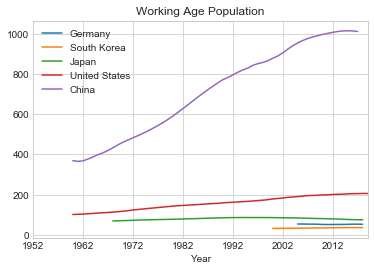

In [38]:
df_countries.plot(title='Working Age Population')

In [39]:
df_temp = df_countries.copy()

In [40]:
# Normalize data
df_temp2 = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())

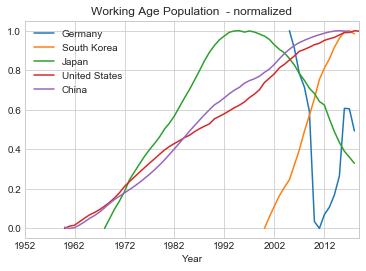

In [41]:
df_temp2.plot(title='Working Age Population  - normalized')

In [42]:
df_temp3 = (df_temp / df_temp.max()) * 100

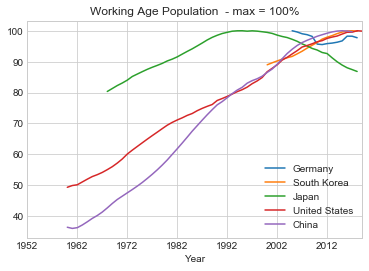

In [43]:
df_temp3.plot(title='Working Age Population  - max = 100%')

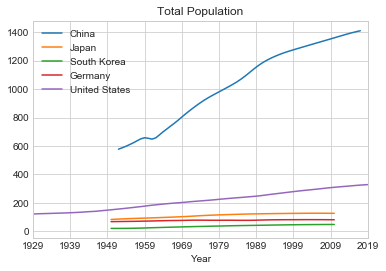

In [44]:
df_countries_total.plot(title='Total Population')

In [45]:
df_countries_total

,China,Japan,South Korea,Germany,United States
Year,,,,,
1929,NaN,NaN,NaN,NaN,121.878
1930,NaN,NaN,NaN,NaN,123.188
1931,NaN,NaN,NaN,NaN,124.149
1932,NaN,NaN,NaN,NaN,124.949
1933,NaN,NaN,NaN,NaN,125.690
...,...,...,...,...,...
2015,1397.028564,NaN,NaN,NaN,320.918
2016,1403.500366,NaN,NaN,NaN,323.186
2017,1409.517456,NaN,NaN,NaN,325.220
